<a href="https://colab.research.google.com/github/zahra-0201/Machine-Learning/blob/main/tugas04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [73]:
#memanggil file dataset
path = "/content/gdrive/MyDrive/SEMESTER 3/ML/tugas/tugas04"

In [75]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
)

In [76]:
#membaca file csv menggunakan pandas (pd)
df = pd.read_csv(path + "/data/calonpembelimobil.csv")
df.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [77]:
#mencari tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [78]:
#cek missing value
df.isnull().sum()

,0
ID,0
Usia,0
Status,0
Kelamin,0
Memiliki_Mobil,0
Penghasilan,0
Beli_Mobil,0


In [79]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
ID,1.000000,0.149779,-0.006634,0.014646,0.068555,0.254177,0.168614
Usia,0.149779,1.000000,0.051476,0.019454,0.090926,0.125859,0.100127
Status,-0.006634,0.051476,1.000000,-0.008561,0.048302,0.071714,0.048584
Kelamin,0.014646,0.019454,-0.008561,1.000000,0.035199,-0.054211,-0.147301
Memiliki_Mobil,0.068555,0.090926,0.048302,0.035199,1.000000,0.137823,0.102005
Penghasilan,0.254177,0.125859,0.071714,-0.054211,0.137823,1.000000,0.763930
Beli_Mobil,0.168614,0.100127,0.048584,-0.147301,0.102005,0.763930,1.000000


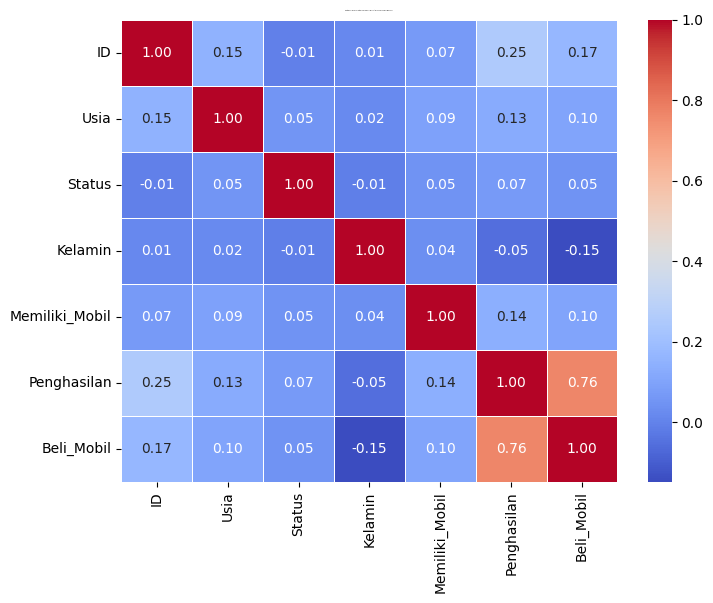

In [80]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi antar variabel numerik terhadap Pembelian Mobil", fontsize=1)
plt.show()

In [81]:
df.duplicated().sum()

np.int64(0)

In [82]:
df = df.drop_duplicates()

In [83]:
df.duplicated().sum()

np.int64(0)

In [84]:
df['Kelamin'].unique()

array([0, 1])

In [85]:
df['Memiliki_Mobil'].unique()

array([0, 1, 2, 4, 3])

In [86]:
df['Beli_Mobil'].unique()

array([1, 0])

In [87]:
feature_num=['Usia','Penghasilan']
feature_bin=['Kelamin','Memiliki_Mobil']

In [88]:
use_cols = feature_num + feature_bin + ['Beli_Mobil']
df_model = df[use_cols].dropna().copy()  #drop baris dengan nilai kosong di kolom yg digunakan


In [89]:
X = df_model[feature_num + feature_bin]
y = df_model['Beli_Mobil']

In [90]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1000, 4)
y shape: (1000,)


In [92]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Data Training:", X_train.shape)
print("Data Testing:", x_test.shape)

Data Training: (800, 4)
Data Testing: (200, 4)


In [93]:
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), feature_num),
        ('bin', 'passthrough', feature_bin)
    ],
    remainder='drop'
)

In [94]:
model = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    class_weight='balanced',
    random_state=42
)

clf = Pipeline([
    ('preprocess', preprocess),
    ('model', model)
])

In [95]:
clf.fit(X_train, y_train)
print("Model Logistic Regression berhasil dilatih.")

Model Logistic Regression berhasil dilatih.


In [96]:
y_pred = clf.predict(x_test)
y_prob = clf.predict_proba(x_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("Hasil Evaluasi pada data test:")
print(f"Akurasi   : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision : {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall    : {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1-Score  : {f1_score(y_test, y_pred, zero_division=0):.4f}")
print(f"ROC-AUC   : {roc_auc_score(y_test, y_prob):.4f}")


Hasil Evaluasi pada data test:
Akurasi   : 0.9300
Precision : 0.9829
Recall    : 0.9055
F1-Score  : 0.9426
ROC-AUC   : 0.9766


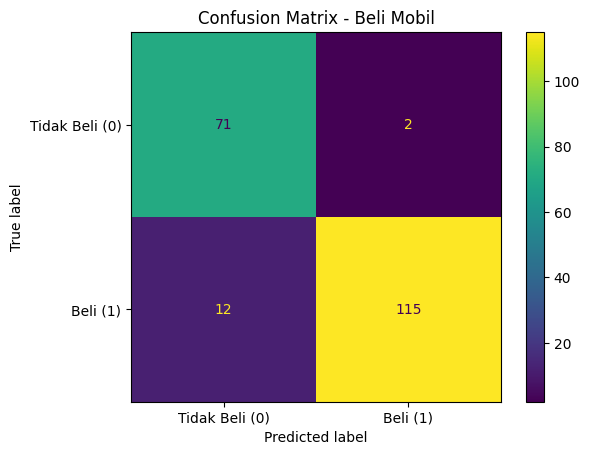

In [98]:
ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, y_pred),
    display_labels=['Tidak Beli (0)', 'Beli (1)']
).plot(values_format='d')
plt.title('Confusion Matrix - Beli Mobil')
plt.show()


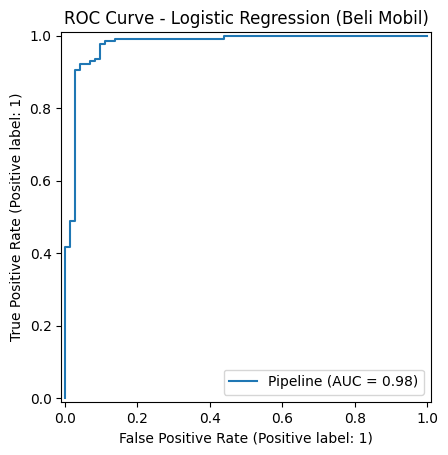

In [99]:
RocCurveDisplay.from_estimator(clf, x_test, y_test)
plt.title('ROC Curve - Logistic Regression (Beli Mobil)')
plt.show()

In [100]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Tidak Beli (0)', 'Beli (1)']))


Classification Report:
                precision    recall  f1-score   support

Tidak Beli (0)       0.86      0.97      0.91        73
      Beli (1)       0.98      0.91      0.94       127

      accuracy                           0.93       200
     macro avg       0.92      0.94      0.93       200
  weighted avg       0.94      0.93      0.93       200



In [101]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)
print("Cross-validation (5-fold):")
print("Skor tiap fold:", scores)
print("Rata-rata akurasi:", np.mean(scores))
print("Standar deviasi:", np.std(scores))


Cross-validation (5-fold):
Skor tiap fold: [0.775 0.915 0.955 0.945 0.94 ]
Rata-rata akurasi: 0.9059999999999999
Standar deviasi: 0.06681317235396023


In [102]:
feat_names = feature_num + feature_bin
coefs = clf.named_steps['model'].coef_[0]
odds = np.exp(coefs)

coef_df = pd.DataFrame({
    'Fitur': feat_names,
    'Koefisien (log-odds)': coefs,
    'Odds Ratio (e^coef)': odds
}).sort_values(by='Odds Ratio (e^coef)', ascending=False)

print("\nKoefisien dan Odds Ratio:")
display(coef_df)



Koefisien dan Odds Ratio:


,Fitur,Koefisien (log-odds),Odds Ratio (e^coef)
1,Penghasilan,4.521529,91.976151
3,Memiliki_Mobil,0.074619,1.077473
0,Usia,-0.048094,0.953045
2,Kelamin,-1.144533,0.318373


In [103]:
data_baru = pd.DataFrame({
    'Usia': [30, 45],
    'Penghasilan': [5000000, 15000000],
    'Kelamin': [1, 0],           # 1 = Laki-laki, 0 = Perempuan
    'Memiliki_Mobil': [0, 1]      # 0 = belum punya, 1 = sudah punya
})

pred = clf.predict(data_baru)
prob = clf.predict_proba(data_baru)[:, 1]

hasil = data_baru.copy()
hasil['Prob_Beli'] = prob
hasil['Pred (0=Tidak,1=Beli)'] = pred
print("\nContoh prediksi untuk 2 calon pembeli:")
display(hasil)



Contoh prediksi untuk 2 calon pembeli:


,Usia,Penghasilan,Kelamin,Memiliki_Mobil,Prob_Beli,"Pred (0=Tidak,1=Beli)"
0,30,5000000,1,0,1.0,1
1,45,15000000,0,1,1.0,1
